# Datasets

Box Office Mojo:
- bom.movie_gross.csv.gz

IMDB (more infor info [here](https://www.imdb.com/interfaces/)):
- imdb.name.basics.csv.gz
- imdb.title.akas.csv.gz
- imdb.title.basics.csv.gz
- imdb.title.crew.csv.gz
- imdb.title.principals.csv.gz
- imdb.title.ratings.csv.gz

Rotten Tomatoes:
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz

TheMovieDB:
- tmdb.movies.csv.gz

The Numbers:
- tn.movie_budgets.csv.gz

# Genres Data Exploration

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500) # Allows Jupyter Notebook to expand how much data is shown.

## Reading in IMDB's title.basics dataset

In [2]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
g_df = imdb_title_basics_df #g stands for genre(s)
g_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Identifying Duplicates in IMDB's title.basics

Now I want to see how many duplicates are in the `'primary_title'` column.

I probably want to see duplicates later on so I might as well define a function.

In [3]:
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(g_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                                    24
Broken                                  20
The Return                              20
Alone                                   16
Homecoming                              16
                                        ..
Unbroken: The Pearl Bluegrass Circle     1
Power Rangers: Zenith                    1
Touchdown Israel                         1
Candlestick                              1
Bread Machine                            1
Name: primary_title, Length: 136071, dtype: int64

## Creating `'title_dupes_df'` DataFrame to include new movie titles with movie name and movie year for duplicates

To do this, I need to create a new DataFrame called `title_dupes_df`.

But I first need to create a unique ID column within `g_df` so that I can easily merge `title_dupes_df` later.

In [4]:
g_df.reset_index(inplace=True)
g_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
g_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


I now need to create a dataframe of all the duplicate movie titles, and then create a new column called `'updated_title'` that includes the name of the movie and the year of the movie.

In [5]:
title_vcs = pd.Series(g_df['primary_title'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = g_df[g_df['primary_title'].isin(title_dupes)].copy()
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [6]:
title_dupes_df['updated_title'] = title_dupes_df['primary_title'] + ' ' + title_dupes_df['start_year'].astype(str)
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


I want to see how many unique duplicates there are in `title_dupes_df` and compare it to how many unique duplicates there were in `g_df`.

Over 66% of the records that once weren't unique are now unique!

In [7]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
Homecoming 2011                                4
Inside 2016                                    4
                                              ..
Thieves 2016                                   1
37 2016                                        1
Head Full of Honey 2018                        1
Astral 2010                                    1
Half Moon 2016                                 1
Name: updated_title, Length: 14183, dtype: int64

Now lets remove the columns that we don't want to duplicate during the merge.

In [8]:
remove_columns = ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
title_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)
title_dupes_df

,g_unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


## Merging `'title_dupes_df1'` with `'g_df'`

I now need too merge `title_dupes_df` into `g_df`.

In [9]:
g_and_dupes_df = pd.merge(left=g_df, right=title_dupes_df, on=['g_unique_id'], how ='left')
g_and_dupes_df.head(25)

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


Now I need to assign non-null values in the `'updated_title'` column to their respective `'primary_title`'. I found it easiest to create a new column that tells me whether or not a non-null value is in the `'updated_title'` column.

In [10]:
# This code block may take up to 20 seconds to run.

g_and_dupes_df['is_title_NaN'] = g_and_dupes_df['updated_title'].isnull()
g_and_dupes_df.head(25)
for movie_index in list(range(len(g_and_dupes_df.index))):
    if ~g_and_dupes_df['is_title_NaN'][movie_index]:
        g_and_dupes_df['primary_title'][movie_index] = g_and_dupes_df['updated_title'][movie_index]
g_and_dupes_df.head(25)

<ipython-input-10-0615bbde14ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_and_dupes_df['primary_title'][movie_index] = g_and_dupes_df['updated_title'][movie_index]


,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,is_title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


Now lets remove the columns that we don't need for further data exploration.

In [11]:
remove_columns = ['g_unique_id','updated_title', 'is_title_NaN']
g_and_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)

In [12]:
g_df = g_and_dupes_df
display(g_df.head(25))
g_df.info()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


# Using Julian's Exploratory Data

Attempting to merge Julian's data with my own...

## Reading in TheNumber's movie_budgets dataset

In [13]:
# Credit to Julian
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
mm_df = tn_movie_budgets_df #mm stands for money_metrics
display(mm_df)
mm_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Converting columns with \$'s (`str`) to `int` 

In [14]:
# Credit to Julian
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    
    return df

mm_df = clean_a_money_column(mm_df,'worldwide_gross')
mm_df = clean_a_money_column(mm_df,'domestic_gross')
mm_df = clean_a_money_column(mm_df,'production_budget')
display(mm_df)
mm_df.info() # Notice that the dtype for columns 3 thru 5 are now int64 instead of object

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


## Profit Margin & Return on Investment

Profit Margin (PM): $(Revenue-Cost)/Revenue$

Return on Investment (ROI): $Revenue/Cost$

In [15]:
# Credit to Julian
numerator = mm_df['worldwide_gross'] - mm_df['production_budget']
mm_df['profit_margin'] = numerator/mm_df['worldwide_gross']*100
mm_df.loc[mm_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
mm_df['ROI'] = mm_df['worldwide_gross']/mm_df['production_budget']
# mm_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin
mm_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000


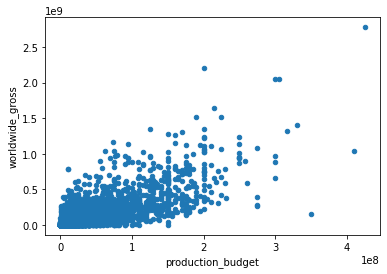

In [16]:
# Credit to Julian
# Scatter plot of worldwide gross revenue vs. production budget cost:
mm_df.plot('production_budget', 'worldwide_gross', kind='scatter');

## Adding `'Year'` column

In [17]:
# Credit to Julian
mm_df['year'] = pd.to_numeric(mm_df['release_date'].map(lambda x: x[-4:]))
mm_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015


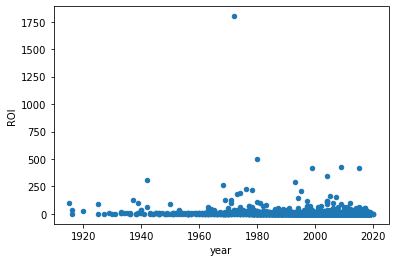

In [18]:
# Credit to Julian
# Scatter plot of ROI vs. Year of Movie Release:
mm_df.plot('year', 'ROI', kind='scatter');

## Dealing Duplicates in TheNumbers' movie_budgets

My approach towards this is the same as my approach early towards IMDB's title.basics dataset. Reference that section if you need to follow along.

In [19]:
determine_dupes(mm_df['movie'])

Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


Home                                         3
Halloween                                    3
King Kong                                    3
The Love Letter                              2
The Karate Kid                               2
                                            ..
Three Billboards Outside Ebbing, Missouri    1
George A. Romero's Survival of the Dead      1
The Flintstones in Viva Rock Vegas           1
Next Day Air                                 1
Transformers: Revenge of the Fallen          1
Name: movie, Length: 5698, dtype: int64

In [20]:
mm_df.reset_index(inplace=True)
mm_df.rename(columns={'index' : 'mm_unique_id'}, inplace=True)
# mm_df

In [21]:
title_vcs = pd.Series(mm_df['movie'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = mm_df[mm_df['movie'].isin(title_dupes)].copy()
# title_dupes_df

In [22]:
title_dupes_df['updated_title'] = title_dupes_df['movie'] + ' ' + title_dupes_df['year'].astype(str)
# title_dupes_df

In [23]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Home 2009                             2
Teenage Mutant Ninja Turtles 2014     1
The Gambler 1999                      1
Legend 1986                           1
Unforgettable 1996                    1
Teenage Mutant Ninja Turtles 1990     1
The Alamo 1960                        1
Unknown 2011                          1
Aladdin 2019                          1
Around the World in 80 Days 1956      1
The Great Gatsby 2013                 1
Fantastic Four 2005                   1
Dawn of the Dead 2004                 1
The Signal 2014                       1
Twilight 1998                         1
Left Behind 2014                      1
Twilight 2008                         1
Venom 2018                            1
Hellboy 2004                          1
Pet Sematary 1989                     1
Point Break 2015                      1
Hellboy 2019                          1
Carrie 1976                           1
Snitch 2012                           1
Robin Hood 2010                       1


In [24]:
remove_columns = ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'year']
title_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)
# title_dupes_df

In [25]:
mm_and_dupes_df = pd.merge(left=mm_df, right=title_dupes_df, on=['mm_unique_id'], how ='left')
# mm_and_dupes_df.head(25)

In [26]:
mm_and_dupes_df['is_title_NaN'] = mm_and_dupes_df['updated_title'].isnull()
mm_and_dupes_df.head(25)
for movie_index in list(range(len(mm_and_dupes_df.index))):
    if ~mm_and_dupes_df['is_title_NaN'][movie_index]:
        mm_and_dupes_df['movie'][movie_index] = mm_and_dupes_df['updated_title'][movie_index]
# mm_and_dupes_df.head(100)

<ipython-input-26-5f9b88f440e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_and_dupes_df['movie'][movie_index] = mm_and_dupes_df['updated_title'][movie_index]


In [27]:
remove_columns = ['mm_unique_id','updated_title', 'is_title_NaN']
mm_and_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)

In [28]:
mm_df = mm_and_dupes_df
# display(mm_df.head(25))
# mm_df.info()

## Merging The Numbers' movie_budgets with IMDB's title.basics

In order to perform a merge later on, I need to rename the movie title column, `'primary_title'`, within IMDB's title.basics.

In [29]:
g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(g_df)

,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Left join g_df into mm_df:

In [30]:
mm_and_g_df = pd.merge(left=mm_df, right=g_df, on='movie', how ='left')
# display(mm_and_g_df)

I need to create a unique ID column in the newly merged DataFrame.

In [31]:
mm_and_g_df.reset_index(inplace=True)
mm_and_g_df.rename(columns={'index' : 'unique_id'}, inplace=True)
mm_and_g_df

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,5789,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
5790,5790,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN
5791,5791,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN
5792,5792,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


## Data Cleaning...

In [32]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 10
Total amount of duplicate movie titles: 23


Home 2015                              4
Brothers 2015                          3
Home 2009                              2
Crossroads 2015                        2
Cinderella 2015                        2
                                      ..
Formula 51                             1
Primer                                 1
Checkmate                              1
U-571                                  1
Transformers: Revenge of the Fallen    1
Name: movie, Length: 5781, dtype: int64

In [33]:
series_vcs = pd.Series(mm_and_g_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)

['Alice in Wonderland 2010',
 'Brothers 2015',
 'Cinderella 2015',
 'Crossroads 2015',
 'Heist 2015',
 'Hercules 2014',
 'Home 2009',
 'Home 2015',
 'Robin Hood 2018',
 'The Square 2013']

In [34]:
def generate_uid_removal_list(test_df, keep_uid_list):
    test_df = test_df.drop_duplicates(subset=['unique_id'])
    for uid in keep_uid_list:
        test_df = test_df[test_df['unique_id'] != uid]

    return test_df['unique_id'].tolist()

def remove_uid_from_df(df, uid_removal_list):
    for uid in uid_removal_list:
        df = df[df['unique_id'] != uid]
    
    return df

def manual_data_cleaning(df, movie_title, keep_uid_list):
    print("Shape of df before cleaning:", df.shape)
    test_df = df[df['movie'] == movie_title]
    uid_removal_list = generate_uid_removal_list(test_df, keep_uid_list)
    df = remove_uid_from_df(df, uid_removal_list)
    print("Shape of df after cleaning:", df.shape)
    
    return(df)

### Legend for Data Cleaning
KEEP `'unique_id'`: `mm_df['release_date']` <--> `g_df['tconst']`

#### Movie Title: Alice in Wonderland 2010

KEEP 50: Mar 5, 2010 <--> tt1014759

In [35]:
movie_title = 'Alice in Wonderland 2010' ######INPUT MANUALLY HERE######
keep_uid_list = [50] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
50,50,51,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt1014759,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"
51,51,51,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt2049386,Alice in Wonderland,2010.0,99.0,"Fantasy,Musical"


Shape of df before cleaning: (5794, 15)
Shape of df after cleaning: (5793, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
50,50,51,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt1014759,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"


#### Movie Title: Brothers 2015

KEEP 3315: Aug 14, 2015 <--> tt3802576

In [36]:
movie_title = 'Brothers 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [3315] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
3314,3314,8,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3650484,Brødre,2015.0,100.0,Documentary
3315,3315,8,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3802576,Brothers,2015.0,156.0,"Action,Drama,Sport"
3316,3316,8,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt4952376,Bracia,2015.0,68.0,Documentary


Shape of df before cleaning: (5793, 15)
Shape of df after cleaning: (5791, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
3315,3315,8,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3802576,Brothers,2015.0,156.0,"Action,Drama,Sport"


#### Movie Title: Cinderella 2015

KEEP 418: Mar 13, 2015 <--> tt1661199

In [37]:
movie_title = 'Cinderella 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [418] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
418,418,13,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt1661199,Cinderella,2015.0,105.0,"Drama,Family,Fantasy"
419,419,13,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt5089556,Cinderella,2015.0,113.0,Fantasy


Shape of df before cleaning: (5791, 15)
Shape of df after cleaning: (5790, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
418,418,13,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt1661199,Cinderella,2015.0,105.0,"Drama,Family,Fantasy"


#### Movie Title: Crossroads 2015

KEEP 5496: Jun 23, 2015 <--> tt1848834

In [38]:
movie_title = 'Crossroads 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [5496] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
5496,5496,86,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt1848834,Crossroads,2015.0,87.0,"Action,Crime,Drama"
5497,5497,86,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt5459744,Kurosurôdo,2015.0,NaN,NaN


Shape of df before cleaning: (5790, 15)
Shape of df after cleaning: (5789, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
5496,5496,86,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt1848834,Crossroads,2015.0,87.0,"Action,Crime,Drama"


#### Movie Title: Heist 2015

KEEP 3833: Nov 13, 2015 <--> tt3276924

In [39]:
movie_title = 'Heist 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [3833] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
3833,3833,25,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt3276924,Heist,2015.0,93.0,"Action,Crime,Thriller"
3834,3834,25,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt5112932,Heist,2015.0,47.0,Action


Shape of df before cleaning: (5789, 15)
Shape of df after cleaning: (5788, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
3833,3833,25,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt3276924,Heist,2015.0,93.0,"Action,Crime,Thriller"


#### Movie Title: Hercules 2014

KEEP 387: Jul 25, 2014 <--> tt1267297

In [40]:
movie_title = 'Hercules 2014' ######INPUT MANUALLY HERE######
keep_uid_list = [387] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
387,387,84,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt1267297,Hercules,2014.0,98.0,"Action,Adventure,Fantasy"
388,388,84,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt3985956,Hercules,2014.0,112.0,Comedy


Shape of df before cleaning: (5788, 15)
Shape of df after cleaning: (5787, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
387,387,84,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt1267297,Hercules,2014.0,98.0,"Action,Adventure,Fantasy"


#### Movie Title: Home 2009

KEEP: Neither have a tconst associated.

In [41]:
movie_title = 'Home 2009' ######INPUT MANUALLY HERE######
keep_uid_list = [] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
3464,3464,56,"Jun 5, 2009",Home 2009,12000000,0,0,0.000000,0.000000,2009,NaN,NaN,NaN,NaN,NaN
5470,5470,60,"Apr 23, 2009",Home 2009,500000,15433,44793168,98.883758,89.586336,2009,NaN,NaN,NaN,NaN,NaN


Shape of df before cleaning: (5787, 15)
Shape of df after cleaning: (5785, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres


#### Movie Title: Home 2015

KEEP 244: Mar 27, 2015 <--> tt2224026

In [42]:
movie_title = 'Home 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [244] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
244,244,44,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt2224026,Home,2015.0,94.0,"Adventure,Animation,Comedy"
245,245,44,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5121236,Home,2015.0,15.0,Documentary
246,246,44,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5775862,Innocent,2015.0,4.0,Drama
247,247,44,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5884960,Home,2015.0,58.0,Documentary


Shape of df before cleaning: (5785, 15)
Shape of df after cleaning: (5782, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
244,244,44,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt2224026,Home,2015.0,94.0,"Adventure,Animation,Comedy"


#### Movie Title: Robin Hood 2018

KEEP 413: Nov 21, 2018 <--> tt4532826

In [43]:
movie_title = 'Robin Hood 2018' ######INPUT MANUALLY HERE######
keep_uid_list = [413] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
413,413,9,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt4532826,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
414,414,9,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt6858500,Robin Hood,2018.0,NaN,NaN


Shape of df before cleaning: (5782, 15)
Shape of df after cleaning: (5781, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
413,413,9,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt4532826,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"


#### Movie Title: The Square 2013

KEEP 5109: Oct 25, 2013 <--> tt2486682

In [44]:
movie_title = 'The Square 2013' ######INPUT MANUALLY HERE######
keep_uid_list = [5109] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
5109,5109,100,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt2486682,Al midan,2013.0,108.0,"Documentary,Drama,History"
5110,5110,100,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt3753108,A tér,2013.0,52.0,Documentary


Shape of df before cleaning: (5781, 15)
Shape of df after cleaning: (5780, 15)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
5109,5109,100,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt2486682,Al midan,2013.0,108.0,"Documentary,Drama,History"


## ANY MORE DUPES?!?

Nope...

In [45]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 0
Total amount of duplicate movie titles: 0


Fame                                   1
Les Choristes                          1
Van Helsing                            1
The Space Between Us                   1
The Frozen Ground                      1
                                      ..
Primer                                 1
Checkmate                              1
U-571                                  1
The Players Club                       1
Transformers: Revenge of the Fallen    1
Name: movie, Length: 5780, dtype: int64

## What to do with NaN Values in `'genres'` column??

How many rows in the `'genres'` column have `NaN` values?

In [46]:
mm_and_g_null_values = mm_and_g_df['genres'].isna().sum()
print(f'Rows with Null Values in Genres Column: {mm_and_g_null_values}')
NaN_in_mm_and_g = mm_and_g_df[mm_and_g_df['genres'].isnull()]
NaN_in_mm_and_g
# NaN_in_genres.to_csv(r'C:\Users\avbro\Documents\Flatiron\1-phase1\projects\New-Film-Studio-at-Microsoft\null_genres.csv')

Rows with Null Values in Genres Column: 4041


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN
5,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015,NaN,NaN,NaN,NaN,NaN
7,7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007,NaN,NaN,NaN,NaN,NaN
15,15,16,"May 4, 2007",Spider-Man 3,258000000,336530303,894860230,71.168682,3.468451,2007,NaN,NaN,NaN,NaN,NaN
19,19,20,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,73.268144,3.740855,2009,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,5787,76,"May 26, 2006",Cavite,7000,70071,71644,90.229468,10.234857,2006,NaN,NaN,NaN,NaN,NaN
5788,5788,77,"Dec 31, 2004",The Mongol King,7000,900,900,-677.777778,0.128571,2004,NaN,NaN,NaN,NaN,NaN
5790,5790,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN
5791,5791,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN


These `NaN` values could in theory be given genres if time permitted.
But for the sake of time, all rows with `NaN`values in the `'genres'` column will be removed.

In [47]:
mm_and_g_df.dropna(axis=0, subset=['genres'], inplace=True)
mm_and_g_df

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,5773,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,Drama
5778,5778,67,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"Comedy,Drama,Horror"
5784,5784,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"Comedy,Drama"
5789,5789,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"


## Converting dtype of `'genres'` from `'string'` to `'list'`

The dtype for the `'genres'` column is currently a `string`, and I need to split up the different genres per title into a `list` of genres.

In [48]:
mm_and_g_df['genres'] = mm_and_g_df['genres'].map(lambda x: x.split(','))

I would like to see how many different genres can be associated with a single movie,
so I can make usful functions. I first want to know how many genres are associated
with each movie, so I want to make a new column called `'genres_len'`.

In [49]:
mm_and_g_df['genres_len'] = mm_and_g_df['genres'].map(lambda x: len(x))

In [50]:
max_genres_for_single_title = mm_and_g_df['genres_len'].max()
print(f'Maximum Amount of Genres for a Single Title: {max_genres_for_single_title}')
mm_and_g_df.drop(columns='genres_len')

Maximum Amount of Genres for a Single Title: 3


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,[Horror]
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,5773,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,[Drama]
5778,5778,67,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"[Comedy, Drama, Horror]"
5784,5784,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"[Comedy, Drama]"
5789,5789,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"[Horror, Sci-Fi, Thriller]"


In [51]:
mm_and_g_df

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genres_len
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,[Horror],1
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",3
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]",3
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]",3
6,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5773,5773,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,[Drama],1
5778,5778,67,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"[Comedy, Drama, Horror]",3
5784,5784,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"[Comedy, Drama]",2
5789,5789,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"[Horror, Sci-Fi, Thriller]",3


## Functions for genre data

Useful functions that will come in handy for data manipulation pertaining to genres...

In [52]:
# Returns a dictionary with all of the unique genre types from a DataFrame.
def unique_g(g_series):
    unique_g_set = set()
    unique_g_list = []
    unique_g_dict = {}
    
    unique_g_set = set([g for g_list in g_series for g in g_list])
    unique_g_list = sorted(list(unique_g_set))
    unique_g_dict = {k: v for k, v in enumerate(unique_g_list)}
        
    return(unique_g_dict)



In [53]:
# I HIGHLY RECOMMEND NOT PERFORMING THIS FUNCTION ON DATAFRAMES WITH OVER 5,000 RECORDS
# AS THIS FUNCTION MAY TAKE VERY LONG TO COMPUTE

# Returns a DataFrame with records pertaining only to a specified genre.
# In addition, the returned DataFrame will have a new genre column categorizing each record with the specified genre.

def movies_w_specified_genres(g_df, g_type):
    movies_for_removal = []
     
    for movie_index in list(range(len(g_df.index))):
        test_df = pd.DataFrame(g_df.iloc[movie_index]).T
        if g_type not in test_df['genres'][test_df.index[0]]:
            movies_for_removal.append(test_df['tconst'][test_df.index[0]])
            
    for movie_for_removal in movies_for_removal:
         g_df = g_df[g_df['tconst'] != movie_for_removal]
    
    g_df['genre'] = g_type
    
    return(g_df)

In [54]:
# Returns a concatenated DataFrame of all of unique genres with genre labels in the genre column.

def concatenate_all_genres(df, unique_g_dict):
    temp_df = pd.DataFrame()
    
    for g_index in list(range(len(unique_g_dict))):
        temp_df = temp_df.append(movies_w_specified_genres(df, unique_g_dict[g_index]))
    
    return(temp_df)

## Setup for Visualization

In [55]:
unique_g_dict = unique_g(mm_and_g_df['genres'])
unique_g_dict

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

In [56]:
# THIS CODE BLOCK WILL TAKE ~1 MINUTE TO FINISH RUNNING
all_g_df = concatenate_all_genres(mm_and_g_df, unique_g_dict)
all_g_df

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genres_len,genre
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",3,Action
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]",3,Action
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]",3,Action
6,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]",3,Action
8,8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017,tt0974015,Justice League,2017.0,120.0,"[Action, Adventure, Fantasy]",3,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,2976,70,"Nov 14, 2014",The Homesman,16000000,2429989,8217571,-94.704737,0.513598,2014,tt2398231,The Homesman,2014.0,122.0,"[Drama, Western]",2,Western
4162,4162,53,"Mar 16, 2012",Casa de mi Padre,6000000,5909483,8446952,28.968461,1.407825,2012,tt1702425,Casa de mi Padre,2012.0,84.0,"[Comedy, Western]",2,Western
4455,4455,46,"Oct 7, 2011",Blackthorn,4500000,200558,1217307,-269.668457,0.270513,2011,tt1629705,Blackthorn,2011.0,102.0,"[Action, Adventure, Western]",3,Western
4949,4949,40,"Apr 8, 2011",Meek's Cutoff,2000000,977772,1869928,-6.955990,0.934964,2011,tt1518812,Meek's Cutoff,2010.0,104.0,"[Drama, Western]",2,Western


I decided to remove Bambi and The Gallows because I considered their ROIs to be outliers.

In [57]:
movie_title = 'The Gallows' ######INPUT MANUALLY HERE######
keep_uid_list = [] ######INPUT MANUALLY HERE######
# display(all_g_df[all_g_df['movie'] == movie_title])
all_g_df = manual_data_cleaning(all_g_df, movie_title, keep_uid_list)
# display(all_g_df[all_g_df['movie'] == movie_title])

movie_title = 'Bambi' ######INPUT MANUALLY HERE######
keep_uid_list = [] ######INPUT MANUALLY HERE######
# display(all_g_df[all_g_df['movie'] == movie_title])
all_g_df = manual_data_cleaning(all_g_df, movie_title, keep_uid_list)
# display(all_g_df[all_g_df['movie'] == movie_title])

all_g_df.sort_values(by='ROI', inplace=True)
all_g_df

Shape of df before cleaning: (4204, 17)
Shape of df after cleaning: (4201, 17)
Shape of df before cleaning: (4201, 17)
Shape of df after cleaning: (4199, 17)


,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genres_len,genre
5327,5327,17,"Dec 31, 2014",Doc Holliday's Revenge,1000000,0,0,0.000000,0.000000,2014,tt3359872,Stranded,2014.0,84.0,[Western],1,Western
5710,5710,99,"Jul 7, 2015",Tiger Orange,100000,0,0,0.000000,0.000000,2015,tt2866824,Tiger Orange,2014.0,75.0,[Drama],1,Drama
5724,5724,13,"Dec 31, 2012",Hayride,60000,0,0,0.000000,0.000000,2012,tt1861343,Hayride,2012.0,93.0,"[Crime, Drama, Horror]",3,Drama
5726,5726,15,"Oct 4, 2013",The Dirties,55000,0,0,0.000000,0.000000,2013,tt2334896,The Dirties,2013.0,83.0,"[Crime, Drama]",2,Drama
5740,5740,29,"Jun 21, 2013",This Is Martin Bonner,42000,0,0,0.000000,0.000000,2013,tt1798291,This Is Martin Bonner,2013.0,83.0,[Drama],1,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,5072,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98.498061,66.580591,2011,tt1591095,Insidious,2010.0,103.0,"[Horror, Mystery, Thriller]",3,Horror
5072,5072,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98.498061,66.580591,2011,tt1591095,Insidious,2010.0,103.0,"[Horror, Mystery, Thriller]",3,Mystery
5072,5072,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98.498061,66.580591,2011,tt1591095,Insidious,2010.0,103.0,"[Horror, Mystery, Thriller]",3,Thriller
5580,5580,69,"May 1, 1981",Graduation Day,250000,23894000,23894000,98.953712,95.576000,1981,tt2616818,Graduation Day,2015.0,75.0,[Thriller],1,Thriller


In [58]:
# all_g_df.sort_values(by='profit_margin', inplace=True)
# all_g_df

## The Visualization

I would like to see a strip plot of return on investment vs. all genre types for all movies released after 2015.

In [59]:
viz_df = all_g_df.loc[all_g_df['year'] > 2015].copy()
viz_df.sort_values(by='year', inplace=True)
viz_df

,unique_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genres_len,genre
1779,1779,73,"Jul 8, 2016",Mike and Dave Need Wedding Dates,33000000,46009673,75898100,56.520651,2.299942,2016,tt2823054,Mike and Dave Need Wedding Dates,2016.0,98.0,"[Adventure, Comedy, Romance]",3,Comedy
355,355,52,"Jul 22, 2016",Ice Age: Collision Course,105000000,64063008,402156682,73.890773,3.830064,2016,tt3416828,Ice Age: Collision Course,2016.0,94.0,"[Adventure, Animation, Comedy]",3,Animation
3658,3658,50,"Nov 11, 2016",Shut In,10000000,6900335,11360665,11.976984,1.136067,2016,tt2582500,Shut In,2016.0,91.0,"[Drama, Mystery, Thriller]",3,Mystery
3658,3658,50,"Nov 11, 2016",Shut In,10000000,6900335,11360665,11.976984,1.136067,2016,tt2582500,Shut In,2016.0,91.0,"[Drama, Mystery, Thriller]",3,Drama
3658,3658,50,"Nov 11, 2016",Shut In,10000000,6900335,11360665,11.976984,1.136067,2016,tt2582500,Shut In,2016.0,91.0,"[Drama, Mystery, Thriller]",3,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,43.196426,1.760453,2019,tt3741700,Godzilla: King of the Monsters,2019.0,132.0,"[Action, Adventure, Fantasy]",3,Action
125,125,25,"May 31, 2019",Godzilla: King of the Monsters,170000000,85576941,299276941,43.196426,1.760453,2019,tt3741700,Godzilla: King of the Monsters,2019.0,132.0,"[Action, Adventure, Fantasy]",3,Adventure
542,542,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0.000000,0.000000,2020,tt7504726,Call of the Wild,2020.0,NaN,"[Adventure, Animation, Family]",3,Adventure
542,542,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0.000000,0.000000,2020,tt7504726,Call of the Wild,2020.0,NaN,"[Adventure, Animation, Family]",3,Animation


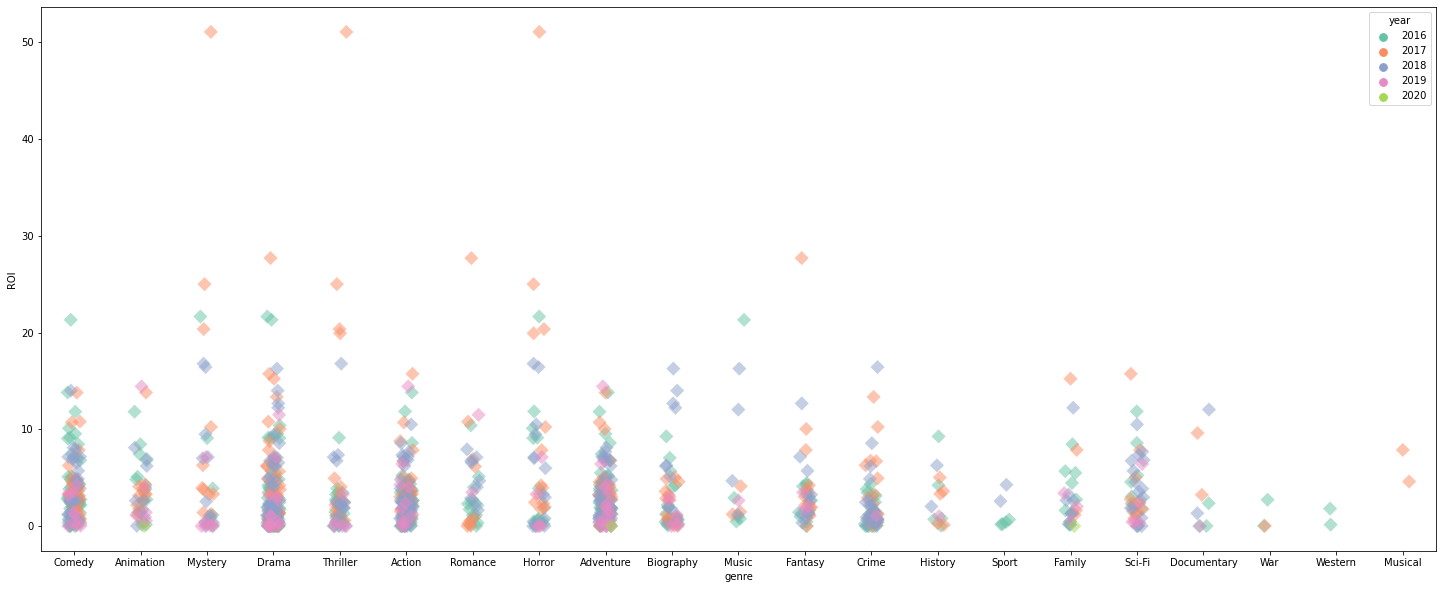

In [60]:
fig, ax = plt.subplots(figsize = (25,10))
ax = sns.stripplot(x="genre", y="ROI", hue="year", data=viz_df,
                   palette="Set2", size=10, marker="D",
                   edgecolor="gray", alpha=.5)

The entire code block below was for testing purposes only. Might have some potentially useful functions for later purposes.

In [61]:
# # test_genres_df = genres_df
# # I HIGHLY RECOMMEND NOT PERFORMING THE FOR LOOP ON ALL +140,000 RECORDS
# # This code block will take ~2 minutes to compute.
# # And the following code block will not compute under 10 minutes...

# # I recommend taking a sample of genres_df to parse through instead
# test_genres_df = genres_df[0:5000]
# movies_for_removal = []

# for movie in list(range(len(test_genres_df.index))):
#     test_df = pd.DataFrame(test_genres_df.iloc[movie]).T
#     for g_type in genre_types:
#         if g_type in test_df['genres'][test_df.index[0]]:
#             break
#         elif g_type == genre_types[len(genre_types)-1]:
#             movies_for_removal.append(test_df['tconst'][test_df.index[0]])

# print("Amount of rows to remove: ", len(movies_for_removal))
# print("Total amount of rows in test_genres_df DataFrame: ", len(test_genres_df.index))
# print("Expected amount of rows after removal: ", len(test_genres_df.index)-len(movies_for_removal))

# for movie_for_removal in movies_for_removal:
#     test_genres_df = test_genres_df[test_genres_df['tconst'] != movie_for_removal]

# test_genres_df

# def select_g_type(unique_g_dict, int_list):
#     g_types_list = []
    
#     g_types_list = [unique_g_dict[index] for index in int_list]
    
#     return g_types_list

# def movies_w_specified_genres(g_df, g_types_list):
#     movies_for_removal = []
    
#     for movie in list(range(len(g_df.index))):
#         test_df = pd.DataFrame(g_df.iloc[movie]).T
#         for g_type in g_types_list:
#             if g_type in test_df['genres'][test_df.index[0]]:
#                 break
#             elif g_type == g_types_list[len(g_types_list)-1]:
#                 movies_for_removal.append(test_df['tconst'][test_df.index[0]])
#     for movie_for_removal in movies_for_removal:
#         g_df = g_df[g_df['tconst'] != movie_for_removal]
    
#     return(g_df)